# Task 2 - Machine Learning
Emilia Couret Villafañe

**Resources**:
- [Scikit learn API - Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)  
- [ChatGPT Consultation](https://chatgpt.com/share/68f7ecee-05a4-800b-87ba-c0946aa015dd)
- [GeeksforGeeks - Regularization in Machine Learning](https://www.geeksforgeeks.org/machine-learning/regularization-in-machine-learning/)
- [GeeksforGeeks - Visualizing an SVM Model](https://www.geeksforgeeks.org/machine-learning/visualizing-support-vector-machines-svm-using-python/)

**Personal Experience**:

**Dates**: Oct 19 - Oct 27

Version

In [1]:
!python --version
!jupyter --version

Python 3.13.1
Selected Jupyter core packages...
IPython          : 9.6.0
ipykernel        : 7.1.0
ipywidgets       : 8.1.7
jupyter_client   : 8.6.3
jupyter_core     : 5.9.1
jupyter_server   : 2.17.0
jupyterlab       : 4.4.10
nbclient         : 0.10.2
nbconvert        : 7.16.6
nbformat         : 5.10.4
notebook         : 7.4.7
qtconsole        : not installed
traitlets        : 5.14.3


Libraries

In [2]:
from PIL import Image
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import floor
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

---
Training SVM Model
---

Averages of RGB channel values and NDVI as training data.

## Read dataset dir names.

In [3]:
path = "/Users/tiffie/Uni/Code/pandahat/Learning_Path/Task_1"

sample_dir = os.listdir(f"{path}/samples/")
label_dir = os.listdir(f"{path}/labels/")
sample_dir.sort()
label_dir.sort()

samples = np.ndarray(shape=(len(label_dir), 256, 256, 3))
labels  = np.ndarray(shape=(len(label_dir), 256, 256))

print("Samples file names:")
__import__('pprint').pprint(sample_dir[:5])
print("\n")

print("Labels file names:")
__import__('pprint').pprint(label_dir[:5])

Samples file names:
['S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_0.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_1.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_10.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_100.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_101.tiff']


Labels file names:
['S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_0.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_1.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_10.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_100.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_101.tiff']


## Load dataset into two multidimensional matrices.

- Dimension 1: Amount of entries in the dataset.  
- D 2 & 3: Pixel matrix.  
- D 4 (`samples` only): RGB channels.

In [4]:
for i in range(len(sample_dir)):
    sample = Image.open(f"{path}/samples/{sample_dir[i]}")
    label = Image.open(f"{path}/labels/{label_dir[i]}")

    if i == 0:
        print(sample_dir[i])
        print(label_dir[i])

    sample_arr = np.array(sample)
    label_arr = np.array(label)

    samples[i] = sample_arr
    labels[i] = label_arr

print(samples.shape)
print(labels.shape, end="\n\n")

print(samples[0][0][:5], end="\n\n")
print(labels[0][0][:5])

S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_0.tiff
S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_0.tiff
(614, 256, 256, 3)
(614, 256, 256)

[[24. 26. 27.]
 [24. 26. 28.]
 [24. 26. 27.]
 [24. 25. 27.]
 [24. 26. 27.]]

[124. 123. 123. 124. 123.]


S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_0.tiff
S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_0.tiff


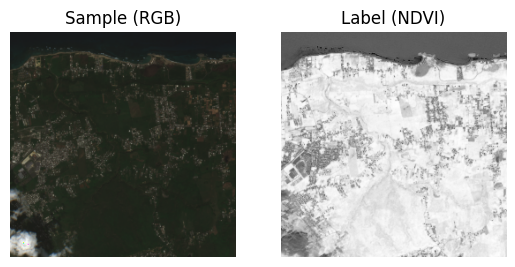

In [5]:
_, axs = plt.subplots(1, 2)

print(sample_dir[0])
print(label_dir[0])

axs[0].imshow(samples[0].astype(np.uint8))
axs[0].set_title("Sample (RGB)")

axs[1].imshow(labels[0], cmap='Grays_r')
axs[1].set_title("Label (NDVI)")

for i in range(2): axs[i].set_axis_off()

## Label Preprocessing

Since SVM is a *classification* algorithm, three classes are introduced, according to the NDVI value:  
- **Class -1** (`0-170`): Sparse to Moderate Vegitation
- **Class 0** (`170-255`): Moderate to Dense Vegitation


This decision is justified based on the statistical distribution of the NDVI values:

In [6]:
label_arr = []

for i in range(len(labels)):
    for j in range(255):
        for k in range(255):
            label_arr.append(labels[i][j][k])

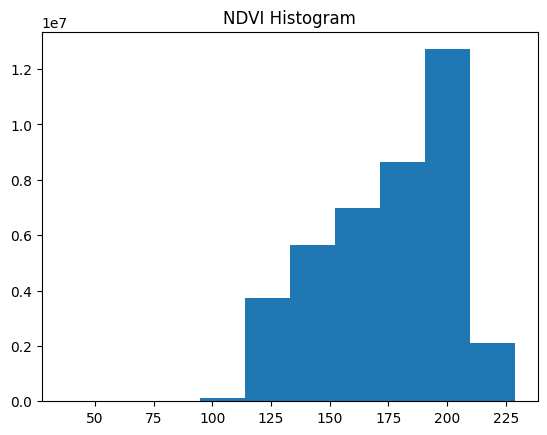

In [7]:
plt.hist(label_arr)
plt.title("NDVI Histogram")
plt.show()

### Assignment of labels

In [8]:
#cat_labels = np.ndarray(shape=(len(labels), 256, 256, 1))
cat_labels = labels.copy()

cat_labels[cat_labels <= 170] = 0
cat_labels[cat_labels >= 170] = 1

#cat_labels[(170 < cat_labels) & (cat_labels < 190)] = 0
#cat_labels[cat_labels <= 170] = -1
#cat_labels[cat_labels >= 190] = 1

"""
<>< fish

for i in range(len(labels)):
    for j in range(255):
        for k in range(255):
            if 170 < category < 190: category = 0
            else:
                if category < 170: category = -1
                elif category > 190: category = 1

            cat_labels[i][j][k] = category
"""

'\n<>< fish\n\nfor i in range(len(labels)):\n    for j in range(255):\n        for k in range(255):\n            if 170 < category < 190: category = 0\n            else:\n                if category < 170: category = -1\n                elif category > 190: category = 1\n\n            cat_labels[i][j][k] = category\n'

S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_0.tiff
S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_0.tiff


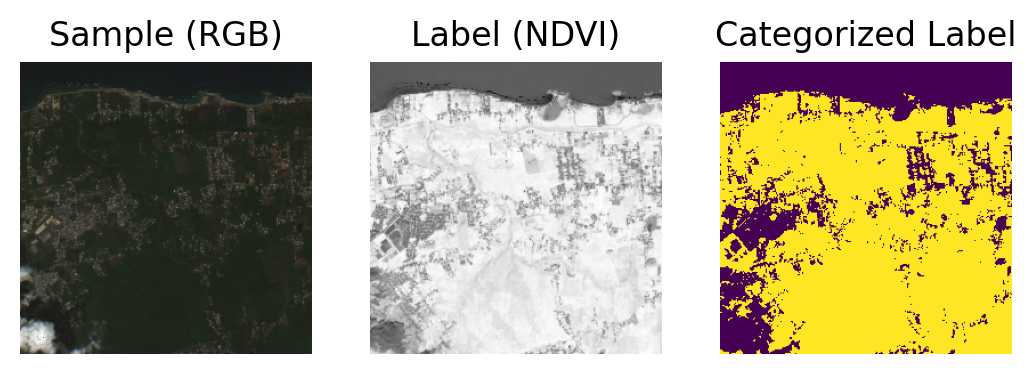

In [9]:
plt.rcParams['figure.dpi'] = 200
_, axs = plt.subplots(1, 3)

print(sample_dir[0])
print(label_dir[0])

axs[0].imshow(samples[0].astype(np.uint8))
axs[0].set_title("Sample (RGB)")

axs[1].imshow(labels[0], cmap='Grays_r')
axs[1].set_title("Label (NDVI)")

axs[2].imshow(cat_labels[0])
axs[2].set_title("Categorized Label")

for i in range(3): axs[i].set_axis_off()

## Model Training

In [10]:
X = samples.reshape(-1, 3)
y = cat_labels.reshape(-1)

print(len(X))
print(len(y))

print(X)
print(y)

40239104
40239104
[[24. 26. 27.]
 [24. 26. 28.]
 [24. 26. 27.]
 ...
 [31. 34. 30.]
 [32. 38. 36.]
 [27. 32. 27.]]
[0. 0. 0. ... 1. 1. 1.]


In [11]:
X_scaled = MinMaxScaler().fit_transform(X)

print(X_scaled[:5])

[[0.09411765 0.10196078 0.10588235]
 [0.09411765 0.10196078 0.10980392]
 [0.09411765 0.10196078 0.10588235]
 [0.09411765 0.09803922 0.10588235]
 [0.09411765 0.10196078 0.10588235]]


In [12]:
# Train on subset, since dataset is massive at 40 million.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=300_000, stratify=y, test_size=0.2, random_state=42)

model = SVC(
    kernel='linear', 
    random_state=42
    #max_iter=10000,
    #degree=2,
)

model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Graphing of Data and Model

In [13]:
print(X_train)

print("\n", y_train)

[[0.16862745 0.15686275 0.13333333]
 [0.09803922 0.11372549 0.08627451]
 [0.25098039 0.25490196 0.27843137]
 ...
 [0.1372549  0.14117647 0.10980392]
 [0.21568627 0.23529412 0.2       ]
 [0.09411765 0.09803922 0.08627451]]

 [0. 1. 0. ... 1. 1. 0.]


Text(0, 0.5, 'Green Channel')

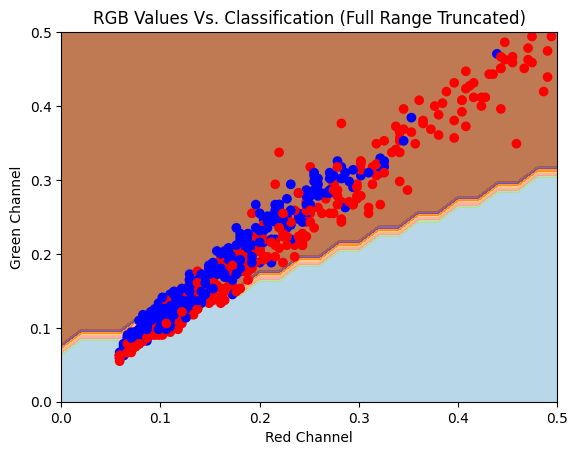

In [14]:
import matplotlib 

plt.rcParams['figure.dpi'] = 100
plt.tight_layout()

colors = ['red', 'blue']
ax = plt.subplot()

limit = 1000
xs = [row[0] for row in X_train[:limit]]
ys = [row[1] for row in X_train[:limit]]

ax.set_xlim(0, 0.5)
ax.set_ylim(0, 0.5)


# Following code snippet copied and modified from GeeksforGeeks.org (see references)
# ---------------
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:,0].max() + 1
y_min, y_max = X_scaled[:,1].min() - 1, X_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_linear = model.predict(
    np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, np.median(X_scaled[:,2]))]
)
Z_linear = Z_linear.reshape(xx.shape)

ax.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
# ---------------

ax.scatter(xs, ys, c=y_train[:limit], cmap=matplotlib.colors.ListedColormap(colors))
ax.set_title("RGB Values Vs. Classification (Full Range Truncated)")
ax.set_xlabel("Red Channel")
ax.set_ylabel("Green Channel")

In [15]:
scaler = MinMaxScaler()
scaler.fit(X)

,feature_range,"(0, ...)"
,copy,True
,clip,False


### Reconstruction of label image for NDVI value

The model can recreate label images, with a degree of uncertainty.

(65536,)


Text(0.5, 1.0, 'Predicted Label')

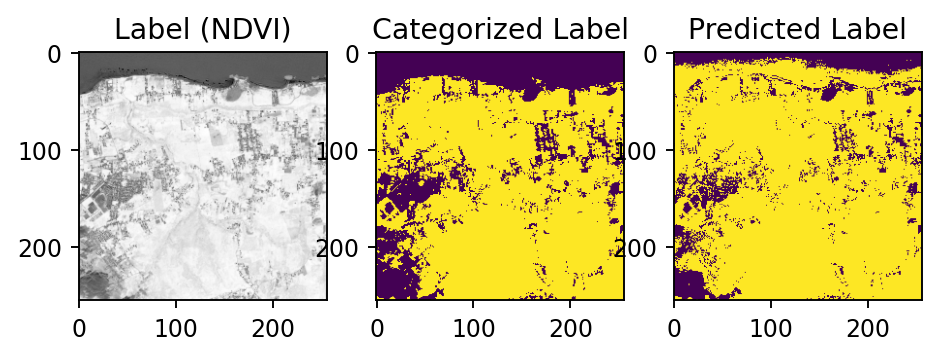

In [16]:
plt.rcParams['figure.dpi'] = 170

temp_sample = samples[0].reshape(-1, 3)

scaled_temp_sample = scaler.transform(temp_sample)

pred_label = model.predict(scaled_temp_sample)

print(pred_label.shape)
pred_label = pred_label.reshape(256, 256, 1)

_, axs = plt.subplots(1, 3)

axs[0].imshow(labels[0], cmap='Grays_r')
axs[0].set_title("Label (NDVI)")

axs[1].imshow(cat_labels[0])
axs[1].set_title("Categorized Label")

axs[2].imshow(pred_label)
axs[2].set_title("Predicted Label")

### Evaluating Model Performance

In [17]:
from sklearn.metrics import accuracy_score, classification_report

a = cat_labels[0].reshape(-1,1)
b = pred_label.reshape(-1,1)
acc = accuracy_score(a, b)

print(f"Accuracy Score: {acc}\n")
print(classification_report(a, b))

Accuracy Score: 0.8699951171875

              precision    recall  f1-score   support

         0.0       0.98      0.57      0.72     19120
         1.0       0.85      0.99      0.92     46416

    accuracy                           0.87     65536
   macro avg       0.91      0.78      0.82     65536
weighted avg       0.89      0.87      0.86     65536



# Neural Network

## Defining Model  

In [116]:
from typing import Sequence

class Perceptron:
    def __init__(self) -> None:
        self.weights: np.ndarray = np.empty(3,) 
        self.bias: float = 0

    def activation(self, x: np.ndarray) -> float:
        return np.dot(x, self.weights) + self.bias

    def predict(self, x: Sequence[float]) -> Sequence[float]:
        return 1 if (self.activation(x) > 0) else 0
        
    def train(self,
        X_train: Sequence[float], 
        y_train: Sequence[int], 
        epochs: int = 10, 
        learning_rate: float = 0.1, 
        threshold: float = 1e-6,
        tolerance: float = 1e-4
    ) -> None:
        y_pred: np.ndarray = np.empty(len(y_train),)
        self.weights = [0.1, 0.1, 0.1]
        previous_error: float = 0

        for k in range(epochs):
            i: int = 0
            total_error: float = 0
            
            while i < len(X_train): # Iterate through each data point in X_train.
                y_pred[i] = self.predict(X_train[i])

                #print(f"Predicted: {y_pred[i]}   Real: {y_train[i]}")
                error = y_train[i] - y_pred[i]
                total_error += abs(error)
                #print(total_error, end=" ")
    
                self.bias += learning_rate * error
                for j in range(len(self.weights)):
                    self.weights[j] = self.weights[j] + learning_rate * error * X_train[i][j]

                i += 1

            if total_error == 0:
                print("Total error break")
                break
                
            #elif abs(previous_error - total_error) < tolerance and (previous_error - total_error) != 0:
            if abs(previous_error - total_error) < tolerance:
                print("Tolerance break")
                break
                
            previous_error = total_error

            if k % 100 == 0: print(f"Epoch {k} weights: {self.weights}\nBias: {self.bias}\n")

        print("Went through all epochs")

        
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=1_500, stratify=y, test_size=0.2, random_state=42)

neural_network = Perceptron()

neural_network.train(
    X_train=X_train, 
    y_train=y_train, 
    epochs=100,
    tolerance=1e-2,
    threshold=1e-2,
    learning_rate=0.1
)

Epoch 0 weights: [np.float64(-0.21254901960784325), np.float64(0.13921568627450975), np.float64(-0.3588235294117651)]
Bias: 0.0

Tolerance break
Went through all epochs


(65536,)


Text(0.5, 1.0, 'Predicted Label')

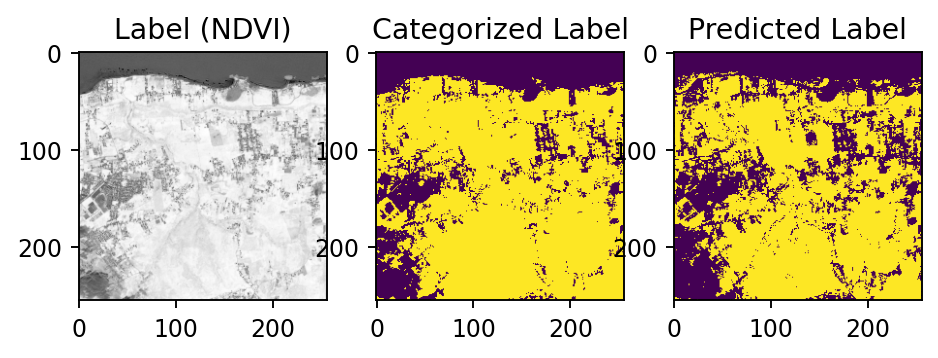

In [117]:
#kplt.rcParams['figure.dpi'] = 170

temp_sample = samples[0].reshape(-1, 3)

scaled_temp_sample = scaler.transform(temp_sample)

pred_label = np.empty((len(temp_sample),))
i = 0
while i < len(pred_label):
    #print(neural_network.predict(scaled_temp_sample[i]), end=" ")
    pred_label[i] = neural_network.predict(scaled_temp_sample[i])
    i += 1

print(pred_label.shape)
pred_label = pred_label.reshape(256, 256, 1)

_, axs = plt.subplots(1, 3)

axs[0].imshow(labels[0], cmap='Grays_r')
axs[0].set_title("Label (NDVI)")

axs[1].imshow(cat_labels[0])
axs[1].set_title("Categorized Label")

axs[2].imshow(pred_label)
axs[2].set_title("Predicted Label")